<a href="https://colab.research.google.com/github/arturogaama/kNN-query-ES-/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **kNN**

Buscar objetos similares por rango, en una consulta dada, es necesario especiﬁcar una distancia máxima **r**. Sin embargo, puede ser difícil especiﬁcar el radio sin algún conocimiento previo de los datos. Cuando se especiﬁca un radio de consulta demasiado pequeño, el resultado puede ser un conjunto vacío, esto requerirá de una o más nuevas búsquedas con radio mayor para obtener algún resultado diferente. Por otro lado, si los radios de consulta son demasiado grandes, las consultas pueden ser computacionalmente muy costosas y los conjuntos de respuestas podrían contener elementos no signiﬁcativos ó incluso podría ser la base de datos completa. 


Los k elementos que se encuentran a la menor distancia de la consulta q pueden
ser ordenados de acuerdo a su distancia respecto de **q**.

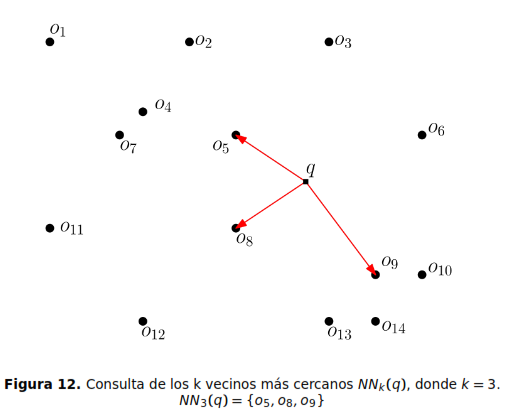

# **Implementación de la consulta kNN en python**

> Bloc con sangría



Así como un árbol binario nos permite ordenar una lista de números, KDTree 
es útil para ordenar conjuntos de datos de 2,3,4,...,k dimensiones.

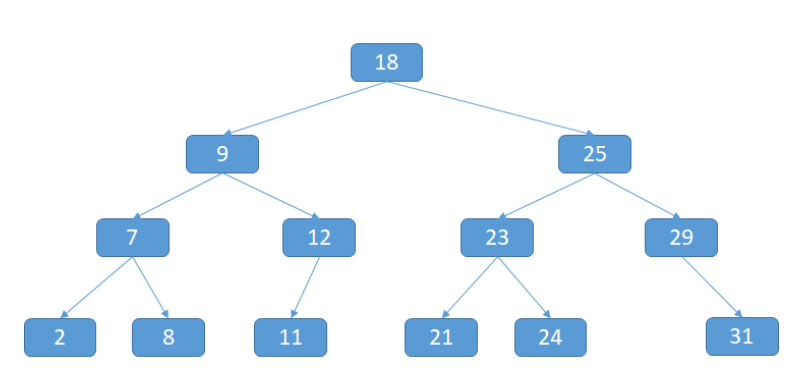

A continuación vamos a utilizar la librería "*scipy.spatial.KDTtree*" para generar esta estructura de datos y la libreria *"matplotlib.pyplot"* para visualizar los puntos en el plano. 


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

Generaremos un conjunto de datos de k=2 dimensiones.

Estos datos se pueden interpretar como puntos en el plano, con coordenadas (x, y).

In [71]:
def generatePoints (n=100, dim=2):
  points = np.random.rand(n,dim)
  return points

In [72]:
sizeSet = 30
pointList = generatePoints(n=sizeSet)
#print(pointList)

¿Cómo se ven estos puntos?

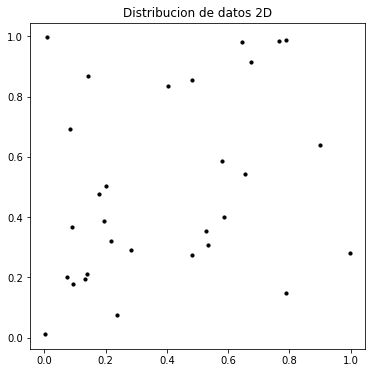

In [73]:
#Esta selda solo es útil si los datos son de dos dimensiones.

fig = plt.figure(figsize=(6,6))
x,y = pointList.T
plt.scatter(x, y ,s=10, c="black")
plt.title('Distribucion de datos 2D')
plt.show()

A continuación, vamos a ordenar el conjunto de datos "pointList". En otras palabras, introduciremos los datos de "pointList" en un árbol K-dimensional.


In [74]:
tree=KDTree(pointList, leafsize=pointList.shape[0]+1)

El conjunto de datos ya está ordenado, ahora podemos hacer las consultas.

Dada una consulta q = [0.5, 0.5], ahora queremos saber que 'punto' del conjunto 'pointList' es el más cercano.

In [84]:
q = [0.5, 0.5]
NN = tree.query(q)
print(NN)

(0.11691105382679749, 7)


# ¿Qué fue lo que obtuvimos de la consulta **"NN = tree.query(q)"**?

NN: "Nearest Neighbor"

Se obtuvieron dos datos, donde **NN** = [dist, index]


**dist:** es la distancia a la que se encuentra el vecino más cercano de q.

**index:** es el índice de la lista "pointList" del punto que se encunentra
más cercano a q.

En la documentación de scipy.spatial.KDTree encontramos que se tienen dos metodos para obtener los vecinos más cercanos.

1) k-vecinos más cercanos (kNN)

2) Consulta por rango 


https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html

# 1) k-vecinos más cercanos (kNN)

Obtenedremos las coordenadas de los k-vecinos más cercanos.

In [76]:
# k es un número entero
k = 4
dist, index = tree.query(q, k)
for i in index: print(pointList[i])

[0.57897774 0.58620157]
[0.58778755 0.39922338]
[0.52789315 0.35258257]
[0.6561039  0.54434955]


***¿Cómo se ve la consulta en el plano?***

In [77]:
def fig_kNN(pointList, index, q):
  fig = plt.figure(figsize=(8,8))
  x,y = pointList.T
  plt.scatter(x, y ,s=10, c="black")

  for i in index:
    point1 = pointList[i][0],pointList[i][1]
    point2 = q[0], q[1]

    plt.scatter(pointList[i][0],pointList[i][1], s=15, c="red")
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, '-g')


  plt.scatter(q[0], q[1], s=40, c="red")
  plt.title('Consulta kNN')
  plt.show()

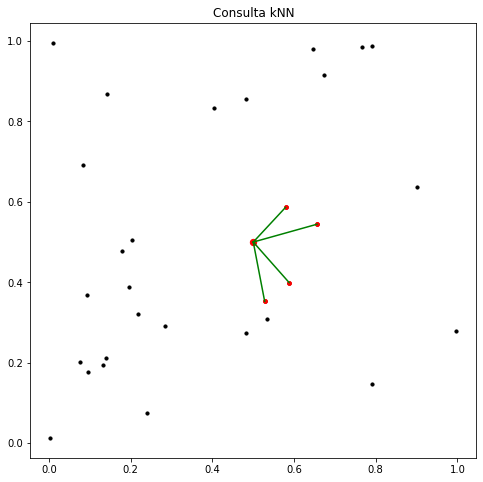

In [78]:
fig_kNN(pointList=pointList, index=index, q=q)

# 2) Consulta por rango.



Obtendremos las coordenadas de los elementos más cercanos dentro de un rango **r**.

La consulta por rango con *scipy.spatial.KDTree* se puede hacer con el método KDTree.query_ball_point(r)

donde se obtienen los elementos que se encuentran a distancia dist<r de la consulta q.

Esta consulta arroja únicamente los ínices de los elementos encontrados.


In [85]:
r = 0.25
index_r = tree.query_ball_point(q, r=r)
print(index_r )

[7, 10, 12, 16, 21, 29]


**¿Cómo se ve esta consulta?**

In [86]:
def figCircle(pointList, index, q, r):
  fig = plt.figure(figsize=(8,8))
  x,y = pointList.T
  plt.scatter(x, y ,s=10, c="black")
  for i in index: plt.scatter(pointList[i][0],pointList[i][1], s=15, c="red")
  circle = plt.Circle(q, r, color='b', fill=False)
  plt.gca().add_patch(circle)
  plt.scatter(q[0], q[1], s=40, c="red")
  plt.title('Consulta por rango')
  plt.show()

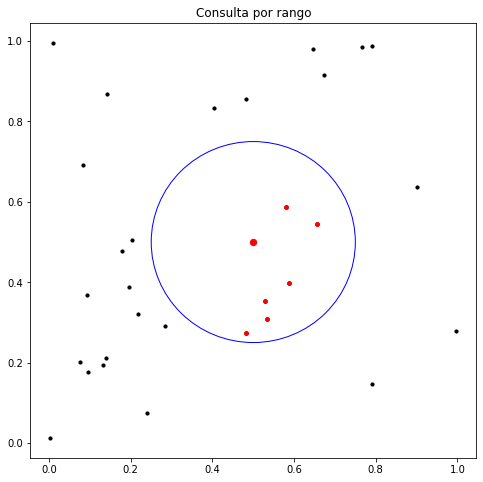

In [87]:
figCircle(pointList=pointList, index=index_r, q=q, r=r)

**Notese que al hacer una consulta por radio o rango,  se debe tener conocimiento de la escala en el conjunto de datos**

- Por un lado, si **r** *es muy grande*, la consulta devolverá el conjunto de datos completo.

Esto *no aporta ninguna información relevante*.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


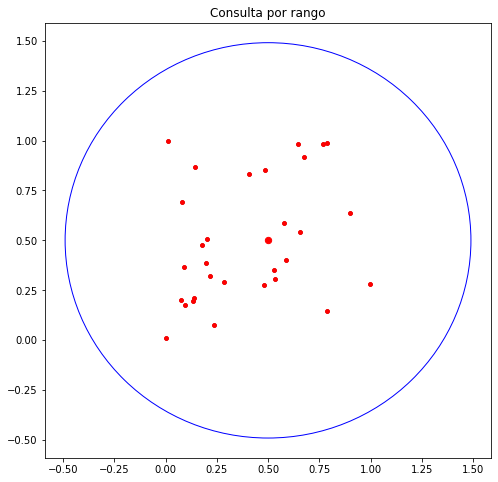

In [88]:
r_tooBig = 0.99
index_r2 = tree.query_ball_point(q, r=r_tooBig)
print(index_r2)
figCircle(pointList=pointList, index=index_r2, q=q, r=r_tooBig)

- Por el otro lado, si **r** *es muy pequeña*, la consulta *NO devolverá ningún dato*.

[]


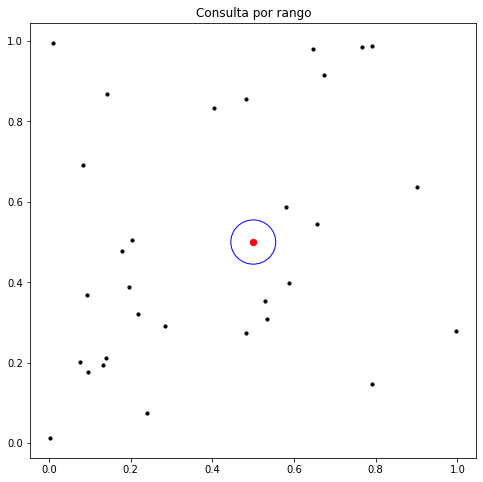

In [89]:
r_tooSmall = 0.055
index_r3 = tree.query_ball_point(q, r=r_tooSmall)
print(index_r3)
figCircle(pointList=pointList, index=index_r3, q=q, r=r_tooSmall)

*MSc. Arturo García-Amador*
- https://arturogaama.github.io
